In [1]:
# Library Sklearn
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
# Libraty lain
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# Gunakan gambar vektor di dalam notebook jupyter dan Setel ukuran font sumbu default matplotlib
%config InlineBackend.figure_format = "svg"
plt.rcParams.update({'font.size': 8})

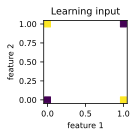

In [7]:
X = np.array([[0.0, 0.0],[1.0, 0.0],[1.0, 1.0],[0.0, 1.0]]);
y = np.array([0, 1, 0, 1]);
# Plot data
plt.figure(figsize=(1.5,1.5))
plt.scatter(X[:,0],X[:,1],c=y,marker="s")
plt.axis("equal");
plt.xlabel("feature 1");plt.ylabel("feature 2");
plt.title("Learning input");

In [8]:
clf = MLPClassifier(hidden_layer_sizes=(2,2), # secara teoritis (2) bisa cukup
                    solver="lbfgs",random_state=123,
                    activation="tanh",
                    tol=1e-9)
clf.fit(X,y);
clf.predict(X)

array([0, 1, 0, 1])

In [9]:
# Kisi evaluasi
xi,yi = np.meshgrid(np.arange(-0.5,1.5,step=0.1),
                    np.arange(-0.5,1.5,step=0.1));
X_test = np.concatenate((xi.reshape(xi.size,1),yi.reshape(yi.size,1)),axis=1)
y_test = clf.predict(X_test);

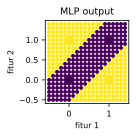

In [11]:
# Plot asli + kisi
plt.figure(figsize=(1.5,1.5))
plt.scatter(X[:,0],X[:,1],c=y,marker="s")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,marker=".")
plt.axis("equal");
plt.xlabel("fitur 1");plt.ylabel("fitur 2");  
plt.title("MLP output");

In [12]:
# Memasukan Data set house.csv

In [17]:
df = pd.read_csv("california_housing/house.csv").drop(columns=["Unnamed: 0"],errors='ignore')

In [18]:
# Memeriksa Data
# Hitung statistik yang dipilih
dfinfo = pd.DataFrame(df.dtypes,columns=["dtypes"])
for (m,n) in zip([df.count(),df.isna().sum()],["count","isna"]):
    dfinfo = dfinfo.merge(pd.DataFrame(m,columns=[n]),right_index=True,left_index=True,how="inner");
# Add to `describe` output
dfinfo.T.append(df.describe())

C:\Users\User\AppData\Local\Temp\ipykernel_3468\286527392.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfinfo.T.append(df.describe())


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64
count,17000,17000,17000,17000,17000,17000,17000,17000,17000
isna,0,0,0,0,0,0,0,0,0
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.13734,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0
25%,-121.79,33.93,18.0,1462.0,297.0,790.0,282.0,2.566375,119400.0
50%,-118.49,34.25,29.0,2127.0,434.0,1167.0,409.0,3.5446,180400.0
75%,-118.0,37.72,37.0,3151.25,648.25,1721.0,605.25,4.767,265000.0


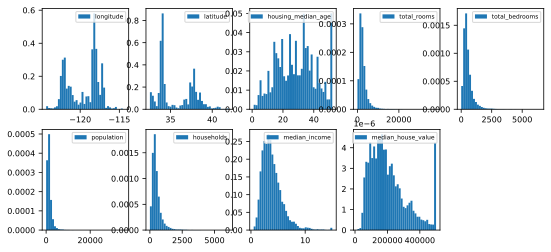

In [19]:
plt.figure(figsize=(9,4))
for (i,v) in enumerate(df.columns):
    plt.subplot(2,5,i+1);
    plt.hist(df.iloc[:,i],40,density=True)
    plt.legend([df.columns[i]],fontsize=6);

In [25]:
# Menskalakan Data
# Skala berarti = 0, std = 1
# Di sini, data diskalakan sebelum pemisahan uji-latih. 
# Data yang digunakan Median_House_Value = data pemisah sebelum disklakan
scx, scy = StandardScaler(), StandardScaler();
X = scx.fit_transform(df.drop(["median_house_value"],axis=1).values);
y = scy.fit_transform(df.median_house_value.values.reshape(df.shape[0],1)).flatten()

# Siapkan fungsi untuk transformasi invers label 
def scyit(yin):
    return scy.inverse_transform(yin.reshape(yin.size,1)).flatten();

In [26]:
[X_train,X_test,y_train,y_test] = train_test_split(X,y,train_size=0.67,test_size=0.33,
                                                   random_state=123);

In [28]:
# Regularisasi yang divalidasi silang
mlp = MLPRegressor(hidden_layer_sizes=(10,5),solver="lbfgs",
                   tol=1e-6,activation="logistic")
parameters = {"alpha":10.0**-np.arange(1, 7)};
mlp_cv = GridSearchCV(mlp,param_grid=parameters,scoring="neg_mean_squared_error",
                      cv=10,return_train_score=True).fit(X_train,y_train)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

In [31]:
# Cetak model/parameter yang dipilih
mlp_cv.best_estimator_

MLPRegressor(activation='logistic', alpha=0.01, hidden_layer_sizes=(10, 5),
             solver='lbfgs', tol=1e-06)

In [33]:
# Bandingkan metrik kinerja berskala yang dicapai untuk berbagai parameter yang memasukkan CV 
dfout = pd.DataFrame(mlp_cv.cv_results_)[["param_alpha","mean_train_score","std_train_score"]];
for i in ["mean_train_score","std_train_score"]:
    dfout[i] =  dfout[i].round(3);
dfout.T

,0,1,2,3,4,5
param_alpha,0.1,0.01,0.001,0.0001,0.00001,0.000001
mean_train_score,-0.223,-0.225,-0.224,-0.228,-0.226,-0.225
std_train_score,0.003,0.006,0.006,0.006,0.006,0.006


In [34]:
# Sebagai alternatif untuk regularisasi CV, gunakan penghentian lebih awal untuk harus menghasilkan hasil yang serupa
mlp_es = MLPRegressor(hidden_layer_sizes=(10,5),solver="adam",
                    tol=1e-6,activation="logistic",early_stopping=True,
                    validation_fraction=0.2,max_iter=2000).fit(X_train,y_train)

In [35]:
# Untuk menunjukkan bagaimana hasilnya berubah dengan setiap kecocokan: jalankan I time dan lihat perbedaannya
mlp_es_i = [];
for i in range(0,10):
    mlp_es.fit(X_train,y_train);
    mlp_es_i = np.append(mlp_es_i,
                mean_squared_error(y_train,mlp_es.predict(X_train)))

In [36]:
print("Scaled mean MSE = {:.3f}+/-{:.3f}".format(
        np.mean(mlp_es_i),np.std(mlp_es_i)))
print("All scaled MSE = {}".format(np.round(mlp_es_i,3)))

Scaled mean MSE = 0.256+/-0.006
All scaled MSE = [0.263 0.264 0.256 0.253 0.254 0.243 0.256 0.256 0.26  0.25 ]


In [37]:
# Tunjukkan hasil
# Cetak final root-mean-square error 
for (t,x,y) in zip(["Train","Test"],[X_train,X_test],[y_train,y_test]):
    for (n,m) in zip(["CV","ES"],[mlp_cv,mlp_es]):
        print(n," RMSE ",t," =\t {:.1f} *1000$".format(
            100*np.sqrt(mean_squared_error(scyit(y),scyit(m.predict(x))))))

CV  RMSE  Train  =	 5535829.4 *1000$
ES  RMSE  Train  =	 5793547.1 *1000$
CV  RMSE  Test  =	 5728681.1 *1000$
ES  RMSE  Test  =	 5965595.6 *1000$


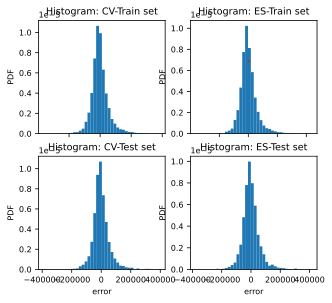

In [38]:
plt.figure(figsize=(5,4.5))
i = 1;
for (t,x,y) in zip(["Train","Test"],[X_train,X_test],[y_train,y_test]):
    for (n,m) in zip(["CV","ES"],[mlp_cv,mlp_es]):
        plt.subplot(2,2,i);i+=1;
        yp = scyit(y)-scyit(m.predict(x));
        plt.hist(yp,40,density=True)
        # cocokkan dan tampilkan distribusi normal
        param_fit = sps.norm.fit(yp)
        plt.plot(np.linspace(-4,4,40),
                 sps.norm.pdf(np.linspace(-4,4,40),loc=param_fit[0],scale=param_fit[1]),"r-")
        plt.title("Histogram: {}-{} set".format(n,t));plt.ylabel("PDF")
        if i < 4:
            plt.gca().set_xticklabels([])
        else:
            plt.xlabel("error")

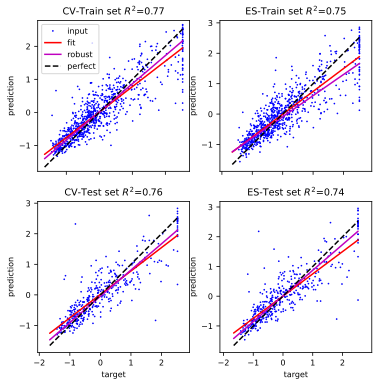

In [39]:
# Plot regresi antara target dan prediksi
plt.figure(figsize=(6,6))
i = 1;
for (t,x,y) in zip(["Train","Test"],[X_train,X_test],[y_train,y_test]):
    for (n,m) in zip(["CV","ES"],[mlp_cv,mlp_es]):
        plt.subplot(2,2,i);
        # target & prediksi untuk merencanakan
        yp = m.predict(x);
        xp = y.reshape(y.size,1); # hanya untuk menyesuaikan garis linier
        # Plot data masukan. Karena kumpulan data yang besar, plot setiap titik data ke-14
        plt.plot(y[::14],yp[::14],"b.",markersize=1.5) 
        # Sesuai garis linear-fit
        lm = LinearRegression().fit(xp,yp)
        plt.plot(y,lm.predict(xp),"r-") 
        # Sama seperti di atas tetapi kuat
        lm = RANSACRegressor(LinearRegression()).fit(xp,yp)
        plt.plot(y,lm.predict(xp),"m-")
        # tambahkan garis pas sempurna
        plt.plot([np.min(y),np.max(y)],[np.min(y),np.max(y)],"k--");
        # Judul (termasuk nilai R^2), Label, dan batasan
        plt.title("{}-{} set $R^2$={:.2f}".format(n,t,r2_score(y,yp)));
        plt.xlim([np.min(y),np.max(y)]);
        plt.ylim([np.min(y),np.max(y)]);
        plt.axis("equal")
        plt.ylabel("prediction")
        if i < 3:
            plt.gca().set_xticklabels([])
        else:
            plt.xlabel("target")
        if i == 1:
            plt.legend(["input","fit","robust","perfect"])
        i+=1; # subplot berikutnya